In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

import ephem

In [239]:
h5_file_path_name = '/Users/orabe/Desktop/h5/15_recording_RP_2021_12_15--14-00-27_cut_1min_mix-grayDLC_dlcrnetms5_DLC_SI_PiCamDec21shuffle1_102500_el.h5'
h5_df = pd.read_hdf(h5_file_path_name)
h5_df.head()

scorer      DLC_dlcrnetms5_DLC_SI_PiCamDec21shuffle1_102500           \
individuals                                          mouse1            
bodyparts                                             snout            
coords                                                    x        y   
0                                                   491.675  554.051   
1                                                   472.503  551.233   
2                                                   458.183  554.405   
3                                                   444.959  554.974   
4                                                   429.396  544.509   

scorer                                                                 \
individuals                                                             
bodyparts              rightEar                      leftEar            
coords      likelihood        x        y likelihood        x        y   
0                  1.0  531.733  540.773        1.0  529.356  579.188   
1                  1.0  513.148  539.489        1.0  513.482  577.488   
2                  1.0  495.815  540.495        1.0  496.324  579.215   
3                  1.0  481.852  538.261        1.0  479.644  576.508   
4                  1.0  475.217  534.597        1.0  462.417  574.364   

scorer                           ...                                          \
individuals                      ...     mouse3                                
bodyparts              shoulder  ...   tailBase    tail1                       
coords      likelihood        x  ... likelihood        x        y likelihood   
0                  1.0  552.813  ...      0.944  953.753  571.501      0.994   
1                  1.0  535.303  ...      0.974  954.287  570.652      0.998   
2                  1.0  519.760  ...      0.968  957.175  567.063      0.999   
3                  1.0  503.120  ...      0.989  954.428  570.358      0.998   
4                  1.0  499.887  ...      0.896  953.911  571.108      0.993   

scorer                                                                 
individuals                                                            
bodyparts      tail2                      tailEnd                      
coords             x        y likelihood        x        y likelihood  
0            897.901  549.811      1.000  866.904  490.089      0.986  
1            897.885  550.274      0.999  867.108  489.972      0.990  
2            897.157  553.019      0.996  866.840  489.948      0.992  
3            897.522  552.785      0.998  866.594  490.117      0.993  
4            896.974  552.937      0.996  866.898  490.050      0.994  

[5 rows x 108 columns]

In [240]:
RFID_file_path = '/Users/orabe/Hetzner/Social-Interaction/PhenoSoft_control/Sample-21.12.09-Thermo-copy.csv'
#file_path = r"X:\Social-Interaction\PhenoSoft_control\Sample-21.12.09-Thermo-copy.csv"
RFID_file_path_thermo = '/Users/orabe/Hetzner/Social-Interaction/Recordings/Thermo_cam/Alexej_thermo_cam/Sample-19.04.10-Thermo-copy.csv'
#file_path_thermo = r"X:\Social-Interaction\Recordings\Thermo_cam\Alexej_thermo_cam\Sample-19.04.10-Thermo-copy.csv"

RFID_df = pd.read_csv(RFID_file_path, sep=';', encoding='UTF-16LE')
RFID_df_thermo = pd.read_csv(RFID_file_path_thermo, sep=';', encoding='UTF-16LE')

/Users/orabe/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [241]:
RFID_df_coords = RFID_df[RFID_df['DateTime'] == '#ID-Device'] 
RFID_df_coords = RFID_df_coords[['IdRFID', 'IdLabel', 'unitLabel']]
RFID_df_coords[['IdLabel', 'unitLabel']] = RFID_df_coords[['IdLabel', 'unitLabel']].astype(int)

RFID_df_thermo_coords = RFID_df_coords
RFID_df_thermo_coords

,IdRFID,IdLabel,unitLabel
0,R1.1,48,33
1,R1.2,73,33
2,R1.3,99,33
3,R1.4,124,33
4,R2.1,48,68
5,R2.2,73,68
6,R2.3,99,68
7,R2.4,124,68


In [242]:
RFID_df = RFID_df[RFID_df['DateTime'] != '#ID-Device']
RFID_df_thermo = RFID_df_thermo[RFID_df_thermo['DateTime'] != '#ID-Device']

RFID_df['DateTime'] = RFID_df['DateTime'].replace(",", ".", regex=True)
# #df_thermo['DateTime'] = df_thermo['DateTime'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(float(x))))
# #df['DateTime'] = df['DateTime'].apply(calc_time)
RFID_df['DateTime'] = RFID_df['DateTime'].apply(lambda x: ephem.Date(float(x) - ephem.hour))

RFID_df_thermo['DateTime'] = RFID_df_thermo['DateTime'].replace(",", ".", regex=True)
#df_thermo['DateTime'] = df_thermo['DateTime'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(float(x))))
#df_thermo['DateTime'] = df_thermo['DateTime'].apply(calc_time)
RFID_df_thermo['DateTime'] = RFID_df_thermo['DateTime'].apply(lambda x: ephem.Date(float(x) - ephem.hour))
RFID_df_thermo

,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3
8,43565.445134,NaN,NaN,Control,NaN,NaN,NaN,NaN,NaN,NaN,start,ThermoConfig.xlsx,NaN,NaN
9,43565.445183,04185D0A6A,23,R1.4,999.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
10,43565.445187,04185D085B,24,R1.1,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11,43565.445186,04185D1ADD,21,R2.4,66.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
12,43565.445198,04185D1ADD,21,R1.3,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70885,43566.441403,04185D0A6A,23,R1.3,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
70886,43566.441404,04185D0A6A,23,R2.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
70887,43566.441415,04185D0A6A,23,R2.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
70888,43566.441434,04185D0A6A,23,R2.2,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


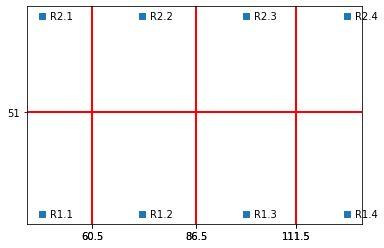

In [243]:
fig = plt.figure()
ax = fig.gca()

ax.set_xticks(RFID_df_thermo_coords.IdLabel - 25/2)
ax.set_yticks([34+34/2])

plt.scatter(x=RFID_df_thermo_coords.IdLabel, y=RFID_df_thermo_coords.unitLabel, marker='s')

for i, txt in enumerate(RFID_df_thermo_coords.IdRFID):
    ax.annotate(txt, (RFID_df_thermo_coords.IdLabel[i]+2, RFID_df_thermo_coords.unitLabel[i]-0.5))

plt.grid(color='r', linestyle='-', linewidth=2)
plt.show()


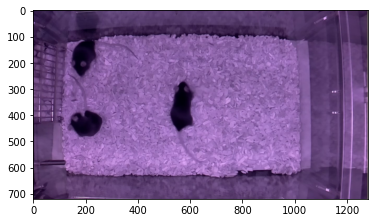

In [244]:
image_path_name = '/Users/orabe/Desktop/h5/img00767.png'
im = plt.imread(image_path_name)
implot = plt.imshow(im)

In [245]:
xleft_coord = 200
x_right_coord = 1180
y_up_coord = 225
y_buttom_coord = 500

x_RFID_coords = [i for j in (range(xleft_coord, x_right_coord, int((x_right_coord - xleft_coord) / 4)), range(xleft_coord, x_right_coord, int((x_right_coord - xleft_coord) / 4))) for i in j]
y_RFID_coords = [y_up_coord] * 4 + [y_buttom_coord] * 4

RFID_df_thermo_coords_adjusted = RFID_df_thermo_coords
RFID_df_thermo_coords_adjusted['IdLabel'] = x_RFID_coords
RFID_df_thermo_coords_adjusted['unitLabel'] = y_RFID_coords
RFID_df_thermo_coords_adjusted

,IdRFID,IdLabel,unitLabel
0,R1.1,200,225
1,R1.2,445,225
2,R1.3,690,225
3,R1.4,935,225
4,R2.1,200,500
5,R2.2,445,500
6,R2.3,690,500
7,R2.4,935,500


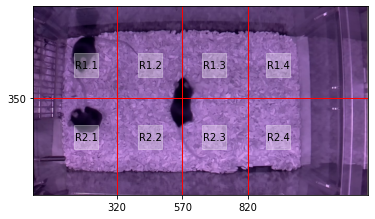

In [246]:
ygridline = [350]
#xgridlines = [i for i in range(100, 1300, int((1300-100)/5))]
xgridlines = [320, 570, 820]

fig = plt.figure()

image_path_name = '/Users/orabe/Desktop/h5/img00767.png'
im = plt.imread(image_path_name)
implot = plt.imshow(im)

ax = fig.gca()

ax.set_xticks(xgridlines)
ax.set_yticks(ygridline)

plt.scatter(x=RFID_df_thermo_coords.IdLabel, y=RFID_df_thermo_coords.unitLabel, marker='s', s=600, alpha=0.3, c='white')

for i, txt in enumerate(RFID_df_thermo_coords.IdRFID):
    ax.annotate(txt, (RFID_df_thermo_coords.IdLabel[i]-40, RFID_df_thermo_coords.unitLabel[i]+10))

plt.grid(color='r', linestyle='-', linewidth=1)
#plt.show()

plt.savefig("/Users/orabe/Desktop/h5/sample.png")

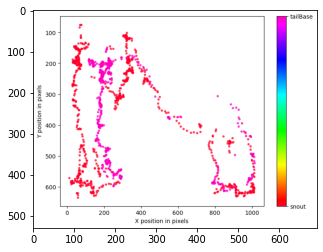

In [22]:
image_path_name = '/Users/orabe/Desktop/h5/trajectorymouse2.png'
im = plt.imread(image_path_name)
implot = plt.imshow(im)

In [5]:
# The plotting functions below are put here for simplicity and so that the user can edit them. Note that they 
# (or variants thereof) are in fact in standard DLC and accessible via:
# import deeplabcut

This program needs access to the screen. Please run with a
Framework build of python, and only when you are logged in
on the main display of your Mac.


In [ ]:
# def get_cmap(n, name='hsv'):
#     return plt.cm.get_cmap(name, n)

# def Histogram(vector,color,bins):
#     dvector=np.diff(vector)
#     dvector=dvector[np.isfinite(dvector)]
#     plt.hist(dvector,color=color,histtype='step',bins=bins)

# def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
#     ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
#     plt.figure(figsize=fs)
#     colors = get_cmap(len(bodyparts2plot),name = colormap)
#     scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

#     for bpindex, bp in enumerate(bodyparts2plot):
#         Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
#         plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

#     plt.gca().invert_yaxis()

#     sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
#     sm._A = []
#     cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
#     cbar.set_ticklabels(bodyparts2plot)
#     #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
#     plt.figure(figsize=fs)
#     Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

#     for bpindex, bp in enumerate(bodyparts2plot):
#         Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
#         plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
#         plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

#     sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
#     sm._A = []
#     cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
#     cbar.set_ticklabels(bodyparts2plot)
#     plt.xlabel('Frame index')
#     plt.ylabel('X and y-position in pixels')
#     #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

#     plt.figure(figsize=fs)
#     for bpindex, bp in enumerate(bodyparts2plot):
#         Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
#         plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

#     sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
#     sm._A = []
#     cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
#     cbar.set_ticklabels(bodyparts2plot)
#     plt.xlabel('Frame index')
#     plt.ylabel('likelihood')

#     #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

#     plt.figure(figsize=fs)
#     bins=np.linspace(0,np.amax(Dataframe.max()),100)

#     for bpindex, bp in enumerate(bodyparts2plot):
#         Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
#         X=Dataframe[scorer][bp]['x'].values
#         X[Index]=np.nan
#         Histogram(X,colors(bpindex),bins)
#         Y=Dataframe[scorer][bp]['x'].values
#         Y[Index]=np.nan
#         Histogram(Y,colors(bpindex),bins)

#     sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
#     sm._A = []
#     cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
#     cbar.set_ticklabels(bodyparts2plot)
#     plt.ylabel('Count')
#     plt.xlabel('DeltaX and DeltaY')
    
#     #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

In [ ]:
# bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

# bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

# %matplotlib inline
# PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

# # These plots can are interactive and can be customized (see https://matplotlib.org/) [in the code above]
# # note that the snout and other bpts jitter in this example that was not trained for long.